## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which index has produced the highest average annual return?
- 📊 **Visualize**: Create a plot visualizing a 30 day moving average for an index of your choosing.
- 🔎 **Analyze**: Compare the volatilities of the indexes included in the dataset.

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You are working for an investment firm that is looking to invest in index funds. They have provided you with a dataset containing the returns of 13 different indexes. Your manager has asked you to make short-term forecasts for several of the most promising indexes to help them decide which would be a good fund to include. Your analysis should also include a discussion of the associated risks and volatility of each fund you focus on.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

# Stock Exchange Data
This dataset consists of stock exchange data since 1965 for several indexes. It contains the daily stock prices along with the volume traded each day.

Not sure where to begin? Scroll to the bottom to find challenges!

In [1]:
import pandas as pd
stock = pd.read_csv("stock_data.csv", index_col=None)
print(stock.shape)
stock.head(12000)

(104224, 9)


Index        Date         Open  ...    Adj Close  Volume    CloseUSD
0       HSI  1986-12-31  2568.300049  ...  2568.300049     0.0  333.879006
1       HSI  1987-01-02  2540.100098  ...  2540.100098     0.0  330.213013
2       HSI  1987-01-05  2552.399902  ...  2552.399902     0.0  331.811987
3       HSI  1987-01-06  2583.899902  ...  2583.899902     0.0  335.906987
4       HSI  1987-01-07  2607.100098  ...  2607.100098     0.0  338.923013
...     ...         ...          ...  ...          ...     ...         ...
11995   NYA  1979-12-28   654.299988  ...   654.299988     0.0  654.299988
11996   NYA  1979-12-31   655.039978  ...   655.039978     0.0  655.039978
11997   NYA  1980-01-02   641.719971  ...   641.719971     0.0  641.719971
11998   NYA  1980-01-03   638.020020  ...   638.020020     0.0  638.020020
11999   NYA  1980-01-04   646.799988  ...   646.799988     0.0  646.799988

[12000 rows x 9 columns]

## Data Dictionary
| Column            | Explanation                                                                                             |
| ----------------- | ------------------------------------------------------------------------------------------------------- |
| Index             | Ticker symbol for indexes
| Date              | Data of observation
| Open              | Opening price
| High              | Highest price during trading day
| Low               | Lowest price during trading day
| Close             | Close price
| Adj Close         | Close price adjusted for stock splits and dividends
| Volume            | Number of shares traded during trading day
| CloseUSD          | Close price in terms of USD

[Source](https://www.kaggle.com/mattiuzc/stock-exchange-data) of dataset.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

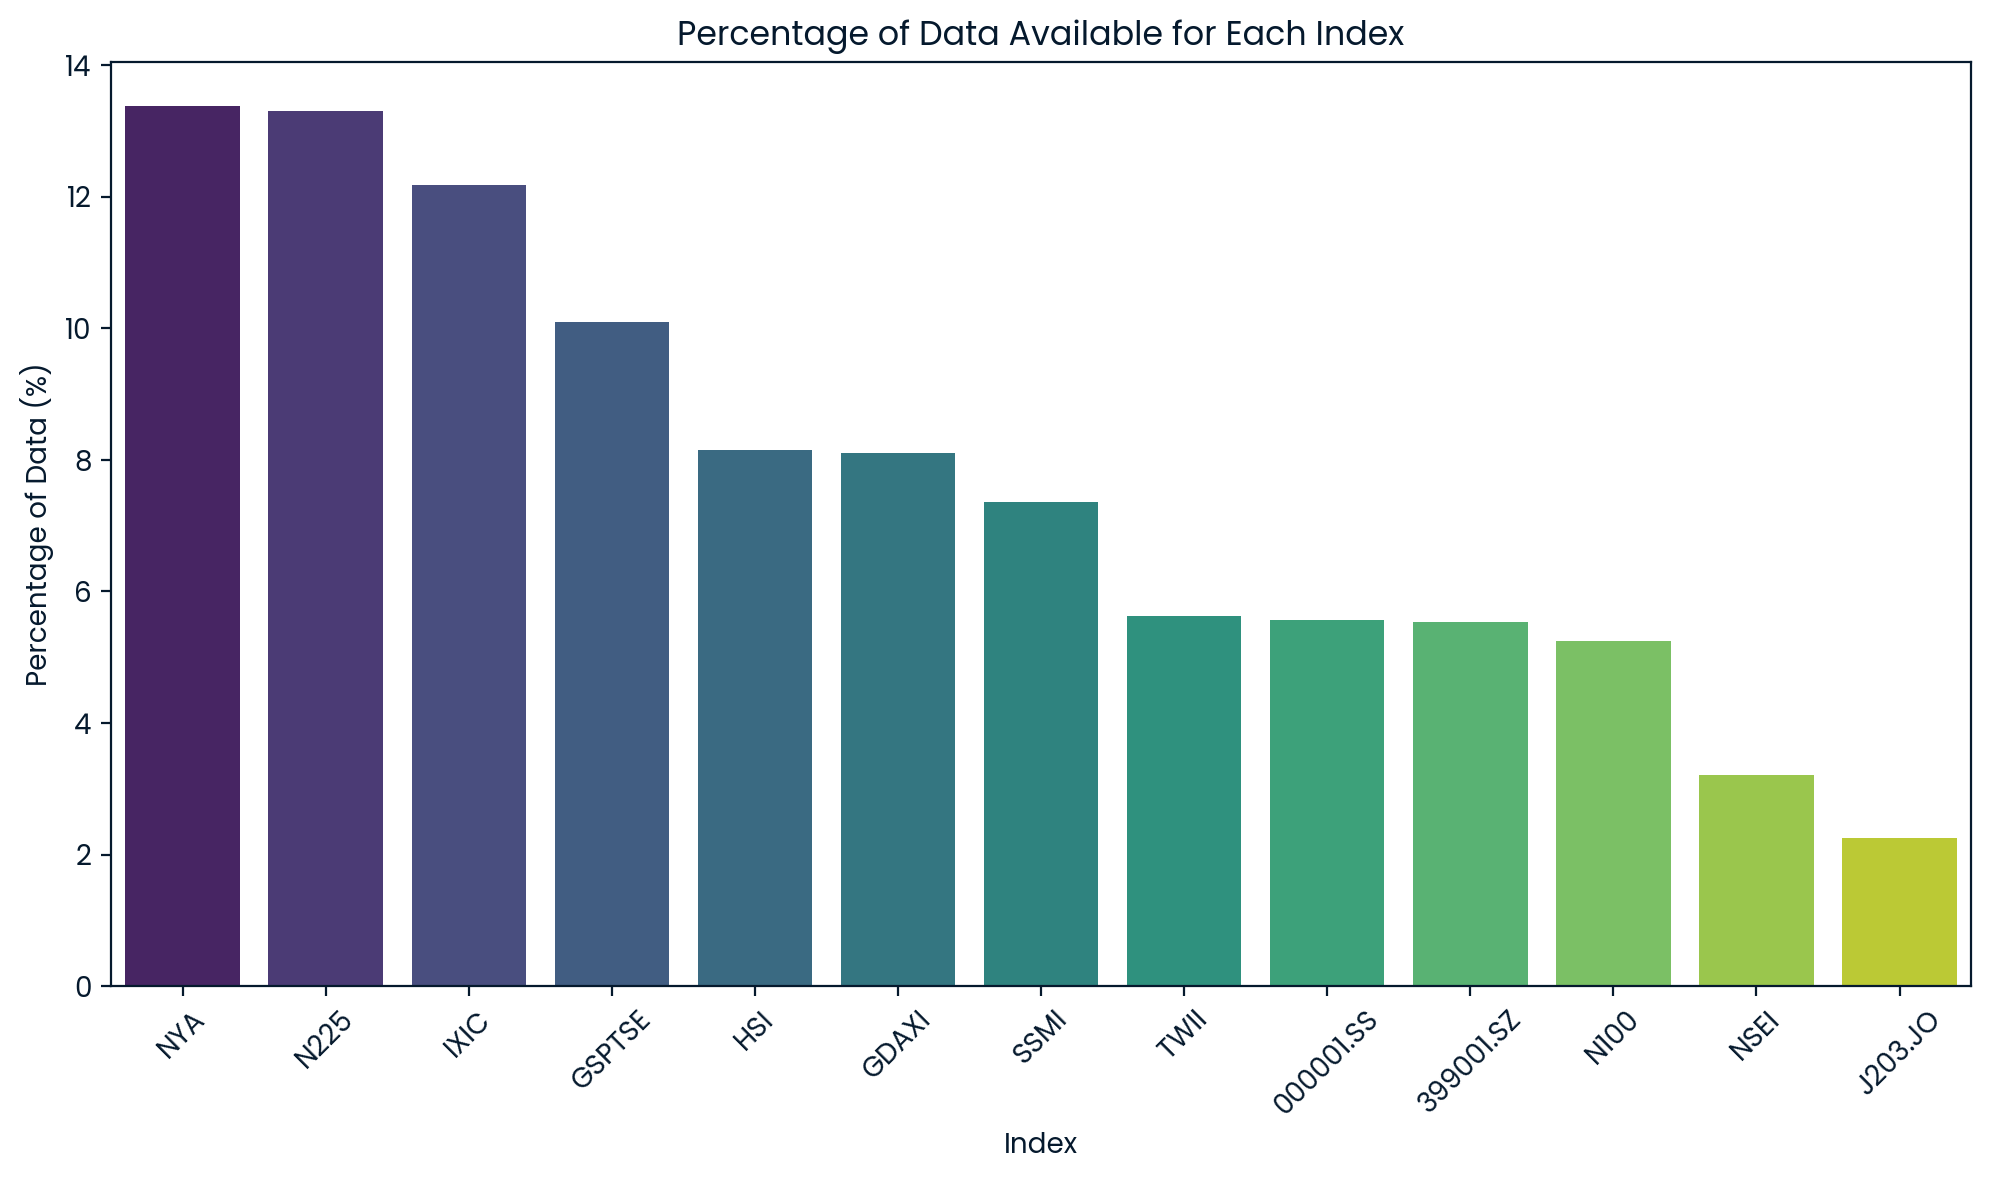

In [3]:
# For which index we have more data
index_counts = (stock['Index'].value_counts(normalize=True) * 100).sort_values(ascending=False).round(2)

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x=index_counts.index, y=index_counts.values, palette="viridis")
plt.title('Percentage of Data Available for Each Index')
plt.xlabel('Index')
plt.ylabel('Percentage of Data (%)')
plt.xticks(rotation=45)
plt.show()

In [4]:
#stock_NYA.shape

In [5]:
#stock_NYA.info()

In [6]:
#stock_NYA.isna().sum()

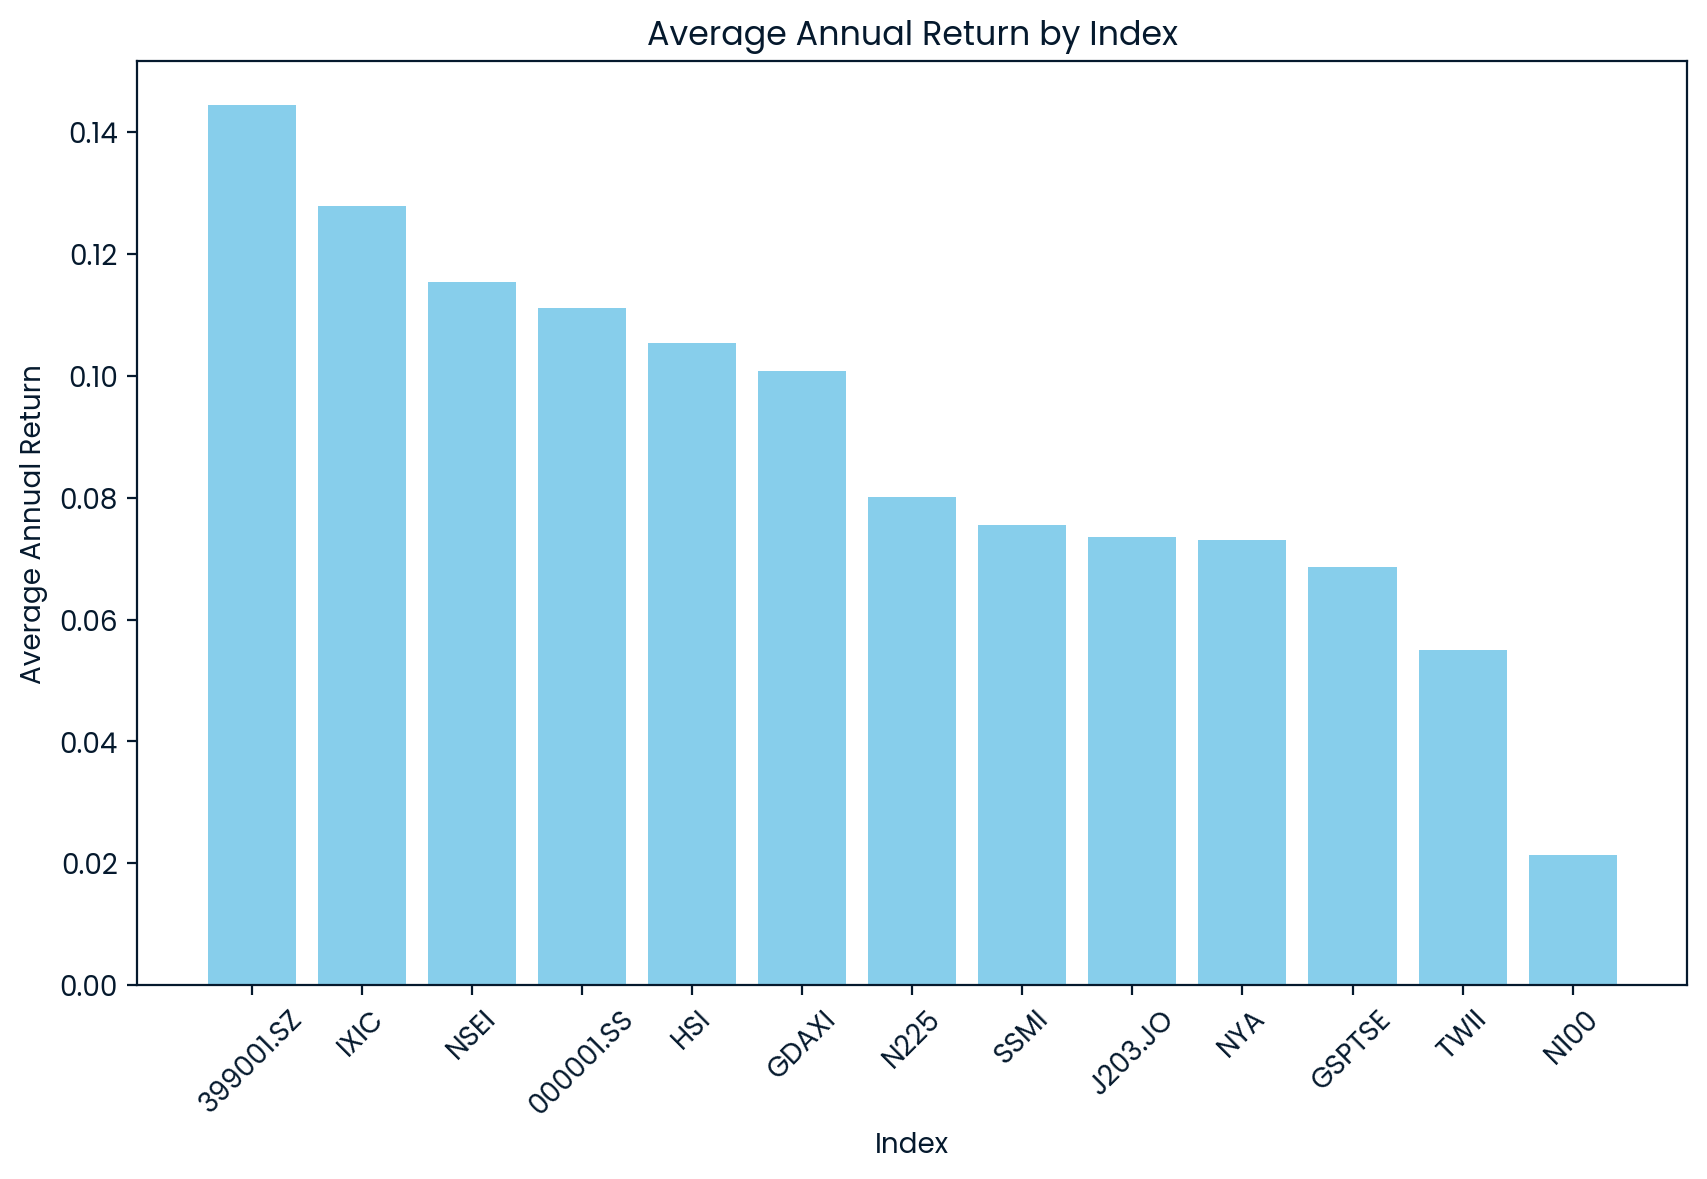

In [7]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
stock['Date'] = pd.to_datetime(stock['Date'])

# Extract year from 'Date' column
stock['Year'] = stock['Date'].dt.year

# Calculate annual return for each index
annual_return = stock.groupby(['Index', 'Year']).apply(
    lambda x: (x.sort_values('Date').iloc[-1]['CloseUSD'] / x.sort_values('Date').iloc[0]['CloseUSD']) - 1
).reset_index(name='Annual Return')

# Calculate average annual return for each index
average_annual_return = annual_return.groupby('Index')['Annual Return'].mean().reset_index()

# Find the index with the highest average annual return
highest_avg_annual_return_index = average_annual_return.loc[average_annual_return['Annual Return'].idxmax()]

# Sort the average annual return values
average_annual_return = average_annual_return.sort_values(by='Annual Return', ascending=False)

# Display the name of each index and the one with the highest average annual return
average_annual_return, highest_avg_annual_return_index

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(average_annual_return['Index'], average_annual_return['Annual Return'], color='skyblue')
plt.xlabel('Index')
plt.ylabel('Average Annual Return')
plt.title('Average Annual Return by Index')
plt.xticks(rotation=45)
plt.show()

According to this Fig we can see that the index **399001.SZ** increased by 14% each year from 1996 to 2010.

I will use The 30-day moving average (MA) is a commonly used statistical method to smooth out short-term fluctuations and highlight longer-term trends.

# Analyzing the data for the index with highst avaliable data 

In [8]:
#Substing that part of data related to NYA Index

stock_NYA = stock[stock['Index']== 'NYA']
stock_NYA

Index       Date          Open  ...        Volume      CloseUSD  Year
8492    NYA 1965-12-31    528.690002  ...  0.000000e+00    528.690002  1965
8493    NYA 1966-01-03    527.210022  ...  0.000000e+00    527.210022  1966
8494    NYA 1966-01-04    527.840027  ...  0.000000e+00    527.840027  1966
8495    NYA 1966-01-05    531.119995  ...  0.000000e+00    531.119995  1966
8496    NYA 1966-01-06    532.070007  ...  0.000000e+00    532.070007  1966
...     ...        ...           ...  ...           ...           ...   ...
22434   NYA 2021-05-24  16375.000000  ...  2.947400e+09  16464.689450  2021
22435   NYA 2021-05-25  16464.689450  ...  3.420870e+09  16390.189450  2021
22436   NYA 2021-05-26  16390.189450  ...  3.674490e+09  16451.960940  2021
22437   NYA 2021-05-27  16451.960940  ...  5.201110e+09  16531.949220  2021
22438   NYA 2021-05-28  16531.949220  ...  4.199270e+09  16555.660160  2021

[13947 rows x 10 columns]

In [9]:
stock_NYA.shape

(13947, 10)

In [10]:
stock_NYA = stock_NYA.sort_values(by='Date')
stock_NYA.iloc[13000:]

Index       Date         Open  ...        Volume     CloseUSD  Year
21492   NYA 2017-08-24  11806.88965  ...  2.846590e+09  11773.79981  2017
21493   NYA 2017-08-25  11804.87988  ...  2.588780e+09  11812.03027  2017
21494   NYA 2017-08-28  11831.01953  ...  2.677700e+09  11800.21973  2017
21495   NYA 2017-08-29  11733.79981  ...  2.737580e+09  11791.87988  2017
21496   NYA 2017-08-30  11783.37988  ...  2.633660e+09  11805.07031  2017
...     ...        ...          ...  ...           ...          ...   ...
22434   NYA 2021-05-24  16375.00000  ...  2.947400e+09  16464.68945  2021
22435   NYA 2021-05-25  16464.68945  ...  3.420870e+09  16390.18945  2021
22436   NYA 2021-05-26  16390.18945  ...  3.674490e+09  16451.96094  2021
22437   NYA 2021-05-27  16451.96094  ...  5.201110e+09  16531.94922  2021
22438   NYA 2021-05-28  16531.94922  ...  4.199270e+09  16555.66016  2021

[947 rows x 10 columns]

In [11]:
stock_NYA.tail(100)

Index       Date         Open  ...        Volume     CloseUSD  Year
22339   NYA 2021-01-06  14594.48047  ...  6.049970e+09  14788.83984  2021
22340   NYA 2021-01-07  14866.91992  ...  5.080870e+09  14928.75000  2021
22341   NYA 2021-01-08  14990.51953  ...  4.764180e+09  14966.83008  2021
22342   NYA 2021-01-11  14828.03027  ...  4.450500e+09  14937.95996  2021
22343   NYA 2021-01-12  14970.78027  ...  4.977210e+09  15010.29004  2021
...     ...        ...          ...  ...           ...          ...   ...
22434   NYA 2021-05-24  16375.00000  ...  2.947400e+09  16464.68945  2021
22435   NYA 2021-05-25  16464.68945  ...  3.420870e+09  16390.18945  2021
22436   NYA 2021-05-26  16390.18945  ...  3.674490e+09  16451.96094  2021
22437   NYA 2021-05-27  16451.96094  ...  5.201110e+09  16531.94922  2021
22438   NYA 2021-05-28  16531.94922  ...  4.199270e+09  16555.66016  2021

[100 rows x 10 columns]

In [12]:
# Calculate the 30-day moving average

stock_NYA['30_day_ma'] =stock_NYA['CloseUSD'].rolling(window = 30 , min_periods =1).mean()

In [13]:
stock_NYA['30_day_ma'].count()

13947

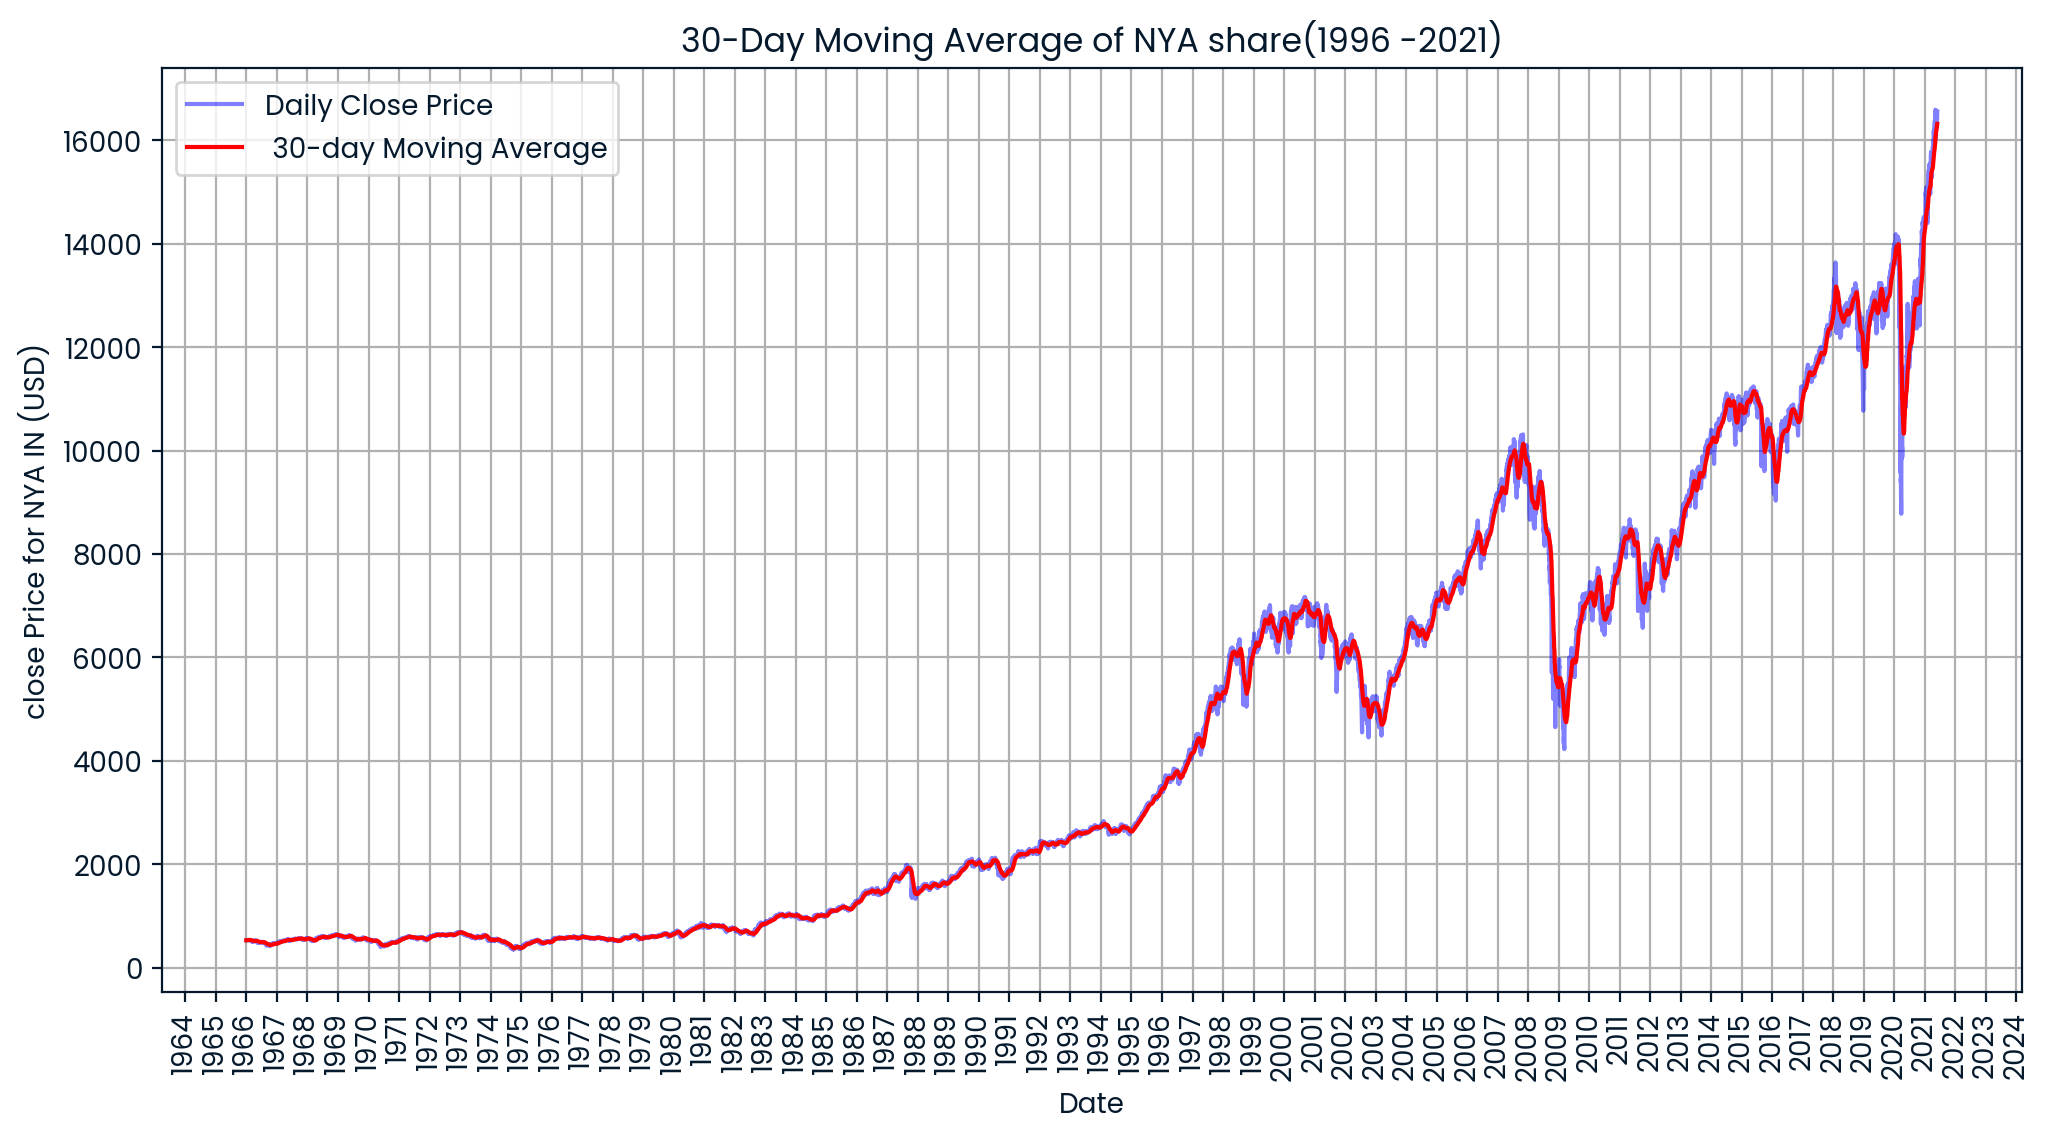

In [14]:
# Plot the stock prices and the moving average

plt.figure(figsize=(12,6))
plt.plot(stock_NYA['Date'],stock_NYA['CloseUSD'], label = 'Daily Close Price', color = 'blue',alpha =0.5)
plt.plot(stock_NYA['Date'], stock_NYA['30_day_ma'], label =' 30-day Moving Average', color ='red')

# Rotate the x-axis labels vertically
plt.xticks(rotation=90)

# Format x-axis to show only the year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set ticks at yearly intervals
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Show only the year

#Adding labels and legends

plt.xlabel('Date')
plt.ylabel('close Price for NYA IN (USD)')
plt.title('30-Day Moving Average of NYA share(1996 -2021)')
plt.legend()
plt.grid(True)
plt.show()

# Now i will analyis the data for the share with the highest average return rate per year.

In [15]:
#Substing that part of data related to 399001.SZ Index

stock_399001SZ = stock[stock['Index']== '399001.SZ']
stock_399001SZ.shape

(5760, 10)

In [16]:
# Calculate the 30-day moving average

stock_399001SZ['30_day_ma1'] =stock_399001SZ['CloseUSD'].rolling(window = 30 , min_periods =1).mean()

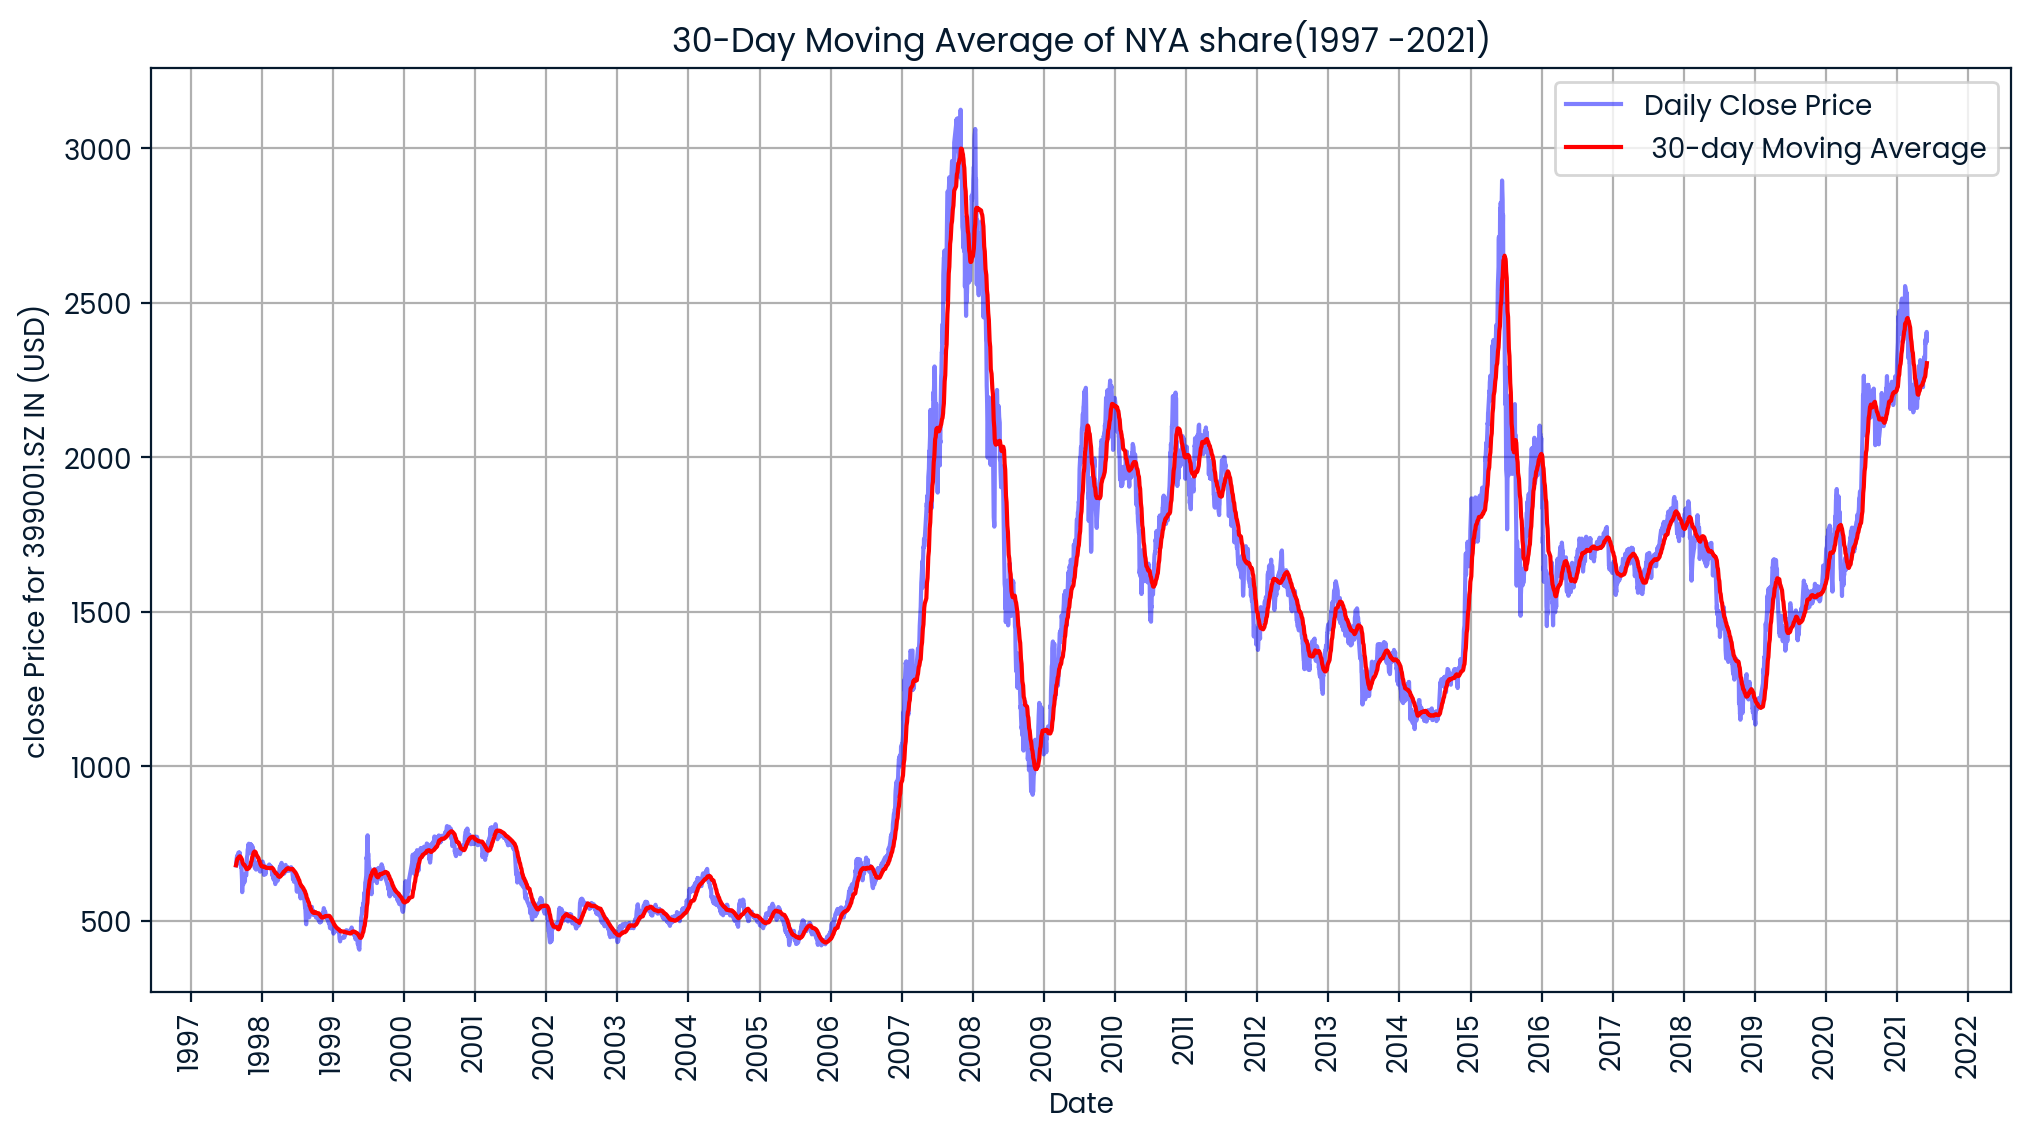

In [17]:
# Plot the stock prices and the moving average

plt.figure(figsize=(12,6))
plt.plot(stock_399001SZ['Date'],stock_399001SZ['CloseUSD'], label = 'Daily Close Price', color = 'blue',alpha =0.5)
plt.plot(stock_399001SZ['Date'], stock_399001SZ['30_day_ma1'], label =' 30-day Moving Average', color ='red')

# Rotate the x-axis labels vertically
plt.xticks(rotation=90)

# Format x-axis to show only the year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set ticks at yearly intervals
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Show only the year

#Adding labels and legends

plt.xlabel('Date')
plt.ylabel('close Price for 399001.SZ IN (USD)')
plt.title('30-Day Moving Average of NYA share(1997 -2021)')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# To interpret the risks associated with investing in the 399001.SZ index, we can calculate and analyze the volatility of the stock.
# One common measure of volatility is the standard deviation of the stock's returns.

# First, we need to calculate the daily returns
stock_399001SZ['Daily_Return'] = stock_399001SZ['CloseUSD'].pct_change()

# Calculate the standard deviation of the daily returns
daily_volatility = stock_399001SZ['Daily_Return'].std()

# Annualize the daily volatility to get the annual volatility
annual_volatility = daily_volatility * (252**0.5)  # Assuming 252 trading days in a year

# Display the annual volatility in percentage
annual_volatility_percentage = annual_volatility * 100
annual_volatility_percentage

27.825612984158383

the risk associated with investing in the 399001.SZ index is approximatly 27%


# Applying a machine learning model to predict the  399001.SZ index


## Data Prepertion

In [54]:
stock_399001SZ.head(50)

Index         Open  ...  Close_Lag14  Close_Lag30
Date                                ...                          
1997-10-22  399001.SZ  4588.109863  ...  3857.520020  4491.270020
1997-10-23  399001.SZ  4537.250000  ...  3916.959961  4497.250000
1997-10-24  399001.SZ  4575.020020  ...  3907.939941  4436.839844
1997-10-27  399001.SZ  4697.259766  ...  3924.790039  4498.959961
1997-10-28  399001.SZ  4678.319824  ...  4061.219971  4466.109863
1997-10-29  399001.SZ  4464.490234  ...  4038.810059  4365.620117
1997-10-30  399001.SZ  4618.270020  ...  4067.500000  4241.250000
1997-10-31  399001.SZ  4451.640137  ...  4039.560059  4261.330078
1997-11-03  399001.SZ  4540.240234  ...  4038.310059  4202.270020
1997-11-04  399001.SZ  4542.560059  ...  4130.529785  4206.439941
1997-11-05  399001.SZ  4616.500000  ...  4263.549805  4238.959961
1997-11-06  399001.SZ  4706.549805  ...  4390.240234  3953.870117
1997-11-07  399001.SZ  4619.839844  ...  4464.589844  3698.909912
1997-11-10  399001.SZ  4670.229980  ...  4552.729980  3910.290039
1997-11-11  399001.SZ  4581.399902  ...  4572.669922  3948.159912
1997-11-12  399001.SZ  4603.069824  ...  4591.060059  3935.649902
1997-11-13  399001.SZ  4517.870117  ...  4654.129883  3857.520020
1997-11-14  399001.SZ  4649.939941  ...  4679.759766  3916.959961
1997-11-17  399001.SZ  4656.049805  ...  4485.899902  3907.939941
1997-11-18  399001.SZ  4583.950195  ...  4594.790039  3924.790039
1997-11-19  399001.SZ  4554.529785  ...  4497.609863  4061.219971
1997-11-20  399001.SZ  4514.629883  ...  4523.319824  4038.810059
1997-11-21  399001.SZ  4439.270020  ...  4528.509766  4067.500000
1997-11-24  399001.SZ  4356.229980  ...  4597.779785  4039.560059
1997-11-25  399001.SZ  4236.990234  ...  4671.339844  4038.310059
1997-11-26  399001.SZ  4282.649902  ...  4618.859863  4130.529785
1997-11-27  399001.SZ  4302.549805  ...  4659.310059  4263.549805
1997-11-28  399001.SZ  4148.060059  ...  4601.529785  4390.240234
1997-12-01  399001.SZ  4250.140137  ...  4596.459961  4464.589844
1997-12-02  399001.SZ  4209.770020  ...  4546.060059  4552.729980
1997-12-03  399001.SZ  4191.209961  ...  4638.569824  4572.669922
1997-12-04  399001.SZ  4151.040039  ...  4608.879883  4591.060059
1997-12-05  399001.SZ  4234.569824  ...  4595.620117  4654.129883
1997-12-08  399001.SZ  4231.339844  ...  4553.970215  4679.759766
1997-12-09  399001.SZ  4218.910156  ...  4524.479980  4485.899902
1997-12-10  399001.SZ  4252.609863  ...  4459.919922  4594.790039
1997-12-11  399001.SZ  4294.870117  ...  4383.379883  4497.609863
1997-12-12  399001.SZ  4316.140137  ...  4248.979980  4523.319824
1997-12-15  399001.SZ  4261.020020  ...  4271.839844  4528.509766
1997-12-16  399001.SZ  4264.529785  ...  4296.910156  4597.779785
1997-12-17  399001.SZ  4284.720215  ...  4185.330078  4671.339844
1997-12-18  399001.SZ  4158.069824  ...  4268.490234  4618.859863
1997-12-19  399001.SZ  4163.200195  ...  4204.540039  4659.310059
1997-12-22  399001.SZ  4132.770020  ...  4189.620117  4601.529785
1997-12-23  399001.SZ  4147.129883  ...  4155.399902  4596.459961
1997-12-24  399001.SZ  4165.580078  ...  4213.700195  4546.060059
1997-12-25  399001.SZ  4114.390137  ...  4222.109863  4638.569824
1997-12-26  399001.SZ  4160.169922  ...  4209.390137  4608.879883
1997-12-29  399001.SZ  4244.540039  ...  4247.359863  4595.620117
1997-12-30  399001.SZ  4209.750000  ...  4280.649902  4553.970215

[50 rows x 18 columns]

In [20]:
stock_399001SZ.set_index("Date", inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [56]:
stock_399001SZ.drop(['Adj Close','Volume','Index',"CloseUSD",'Year'], axis =1)

Open          High  ...   Close_Lag14   Close_Lag30
Date                                    ...                            
1997-10-22   4588.109863   4750.240234  ...   3857.520020   4491.270020
1997-10-23   4537.250000   4628.609863  ...   3916.959961   4497.250000
1997-10-24   4575.020020   4655.819824  ...   3907.939941   4436.839844
1997-10-27   4697.259766   4755.259766  ...   3924.790039   4498.959961
1997-10-28   4678.319824   4678.319824  ...   4061.219971   4466.109863
...                  ...           ...  ...           ...           ...
2021-05-27  14796.049810  14955.299810  ...  13933.809570  13495.719730
2021-05-28  14899.330080  14977.250000  ...  13917.969730  13528.309570
2021-05-31  14874.889650  14996.379880  ...  13966.790040  13738.000000
2021-06-01  14963.950200  15039.019530  ...  14064.870120  13680.269530
2021-06-02  15044.940430  15051.209960  ...  13917.650390  13720.740230

[5720 rows x 13 columns]

In [57]:
stock_399001SZ.shape

(5720, 18)

## Feature Engineering

In [58]:
# Create first 3 lag features
stock_399001SZ['Close_Lag1'] = stock_399001SZ['Close'].shift(1)  # 1-day lag
stock_399001SZ['Close_Lag2'] = stock_399001SZ['Close'].shift(2)  # 2-day lag
stock_399001SZ['Close_Lag3'] = stock_399001SZ['Close'].shift(3)  # 3-day lag
stock_399001SZ["Close_Lag5"] = stock_399001SZ["Close"].shift(5)  # 5-day lag
stock_399001SZ["Close_Lag7"] = stock_399001SZ["Close"].shift(7)  # 7-day lag


In [59]:
# Drop missing values (caused by shifting)
stock_399001SZ.dropna(inplace=True)
stock_399001SZ

Index          Open  ...   Close_Lag14   Close_Lag30
Date                                 ...                            
1997-10-31  399001.SZ   4451.640137  ...   4039.560059   4261.330078
1997-11-03  399001.SZ   4540.240234  ...   4038.310059   4202.270020
1997-11-04  399001.SZ   4542.560059  ...   4130.529785   4206.439941
1997-11-05  399001.SZ   4616.500000  ...   4263.549805   4238.959961
1997-11-06  399001.SZ   4706.549805  ...   4390.240234   3953.870117
...               ...           ...  ...           ...           ...
2021-05-27  399001.SZ  14796.049810  ...  13933.809570  13495.719730
2021-05-28  399001.SZ  14899.330080  ...  13917.969730  13528.309570
2021-05-31  399001.SZ  14874.889650  ...  13966.790040  13738.000000
2021-06-01  399001.SZ  14963.950200  ...  14064.870120  13680.269530
2021-06-02  399001.SZ  15044.940430  ...  13917.650390  13720.740230

[5713 rows x 18 columns]

In [66]:
# Define Features (X) and Target (y)
X = stock_399001SZ[['Close_Lag1', 'Close_Lag2', 'Close_Lag3','Close_Lag5','Close_Lag7','30_day_ma1','Daily_Return']]
y = stock_399001SZ['Close']  # Target: Next day's closing price

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


## XGBoost Regressor Model

In [67]:
# Train XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [68]:
# Make Predictions
y_pred = model.predict(X_test)

In [69]:
# Evaluate Model Performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Display Model Evaluation Metrics
model_performance = pd.DataFrame({
    "Metric": ["RMSE", "MAE"],
    "Value": [rmse, mae]
})
model_performance

Metric      Value
0   RMSE  60.607309
1    MAE  39.374986

## Random Forest model and Hypertunning

In [72]:
from sklearn.ensemble import RandomForestRegressor
# Train a Random Forest Regressor Model
best_rf_model = RandomForestRegressor(
    max_depth=20, 
    min_samples_leaf=2, 
    min_samples_split=2, 
    n_estimators=100,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model Performance
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Display Model Evaluation Metrics
rf_model_performance = pd.DataFrame({
    "Metric": ["RMSE", "MAE"],
    "Value": [rmse_rf, mae_rf]
})
rf_model_performance

Metric      Value
0   RMSE  52.926775
1    MAE  29.606057

In [71]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

# Create the model
rf = RandomForestRegressor(random_state=42)

# Grid search
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring="neg_mean_squared_error", verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train the best model
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Make Predictions
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print(f"Tuned RMSE: {rmse_best_rf}, Tuned MAE: {mae_best_rf}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=1, 

In [73]:
import joblib
# Save the trained model as a .pkl file
joblib.dump(best_rf_model, "best_random_forest_model.pkl")


['best_random_forest_model.pkl']

After applying two machine leanring models on the 'stock_399001.SZ' index data,and we got the best performance from Rndom forest, with Tuned RMSE: 51.64072615656557, Tuned MAE: 28.931376292278493


## **How to Use the Random Forest Prediction Model**

### **Overview**

This guide explains how to use the trained Random Forest model for predicting stock closing prices based on historical data and technical indicators.

---

### **1. Model Input Data**

The model takes in **five features** as input:

1. **`Close_Lag1`** – The closing price from 1 day ago.
2. **`Close_Lag2`** – The closing price from 2 days ago.
3. **`Close_Lag3`** – The closing price from 3 days ago.
4. **`30_day_ma1`** – The 30-day moving average of the closing price.
5. **`Daily_Return`** – The daily return percentage, calculated as:

   
$$\
text{Daily Return} = \frac{\text{Close} - \text{Previous Close}}{\text{Previous Close}}
$$

The input should be formatted as a JSON object when making API requests.

Example Input JSON:

```json
{
    "close_lag1": 150.5,
    "close_lag2": 148.2,
    "close_lag3": 145.8,
    "ma_30": 155.0,
    "daily_return": 0.0023
}
```

---

### **2. Model Output Data**

The model outputs the **predicted closing price** for the next day.

Example Output JSON:

```json
{
    "Predicted_Close_Price": 152.75
}
```

This means that, based on the provided historical data and indicators, the model predicts that the stock will close at **152.75** on the next trading day.

---

# Deploying My Model as FastAPI

In [79]:
!pip install uvicorn

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [84]:
!export PATH=$HOME/.local/bin:$PATH


In [85]:
!source ~/.bashrc


In [86]:
!uvicorn --version


/bin/bash: uvicorn: command not found


In [75]:
!pip install fastapi

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [76]:
from fastapi import FastAPI
import joblib
import numpy as np

# Load the trained model with extra features
model = joblib.load("best_random_forest_model.pkl")

# Initialize FastAPI app
app = FastAPI()

# Define the API endpoint
@app.post("/predict/")
def predict(close_lag1: float, close_lag2: float, close_lag3: float, ma_30: float, daily_return: float):
    # Create input data
    input_data = np.array([[close_lag1, close_lag2, close_lag3, ma_30, daily_return]])
    
    # Make prediction
    predicted_price = model.predict(input_data)[0]
    
    return {"Predicted_Close_Price": round(predicted_price, 2)}

# Run this using: uvicorn app:app --reload


In [83]:
!uvicorn app:app --reload

/bin/bash: uvicorn: command not found


In [88]:
!git config --global user.name "shadymohammed75"
!git config --global user.email "mshady9003@gmail.com"



In [89]:
!git clone https://github.com/shadymohammed75/Stock-Price-analysis-and-Forecasting.git


Cloning into 'Stock-Price-analysis-and-Forecasting'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.


In [94]:
!mv notebook.ipynb Stock-Price-analysis-and-Forecasting/
!mv stock_data.csv Stock-Price-analysis-and-Forecasting/
!mv best_random_forest_model.pkl Stock-Price-analysis-and-Forecasting/

mv: cannot stat 'stock_data.csv': No such file or directory
mv: cannot stat 'best_random_forest_model.pkl': No such file or directory


In [98]:
!cd Stock-Price-analysis-and-Forecasting



In [102]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint:
hint: 	git config --global init.defaultBranch <name>
hint:
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint:
hint: 	git branch -m <name>
Initialized empty Git repository in /work/files/workspace/.git/


In [103]:
!git remote add origin https://github.com/shadymohammed75/Stock-Price-analysis-and-Forecasting.git


In [106]:
!git branch

* master


In [104]:
!git add .
!git commit -m "Added project files: Code, Data, and Model"
!git push -u origin master


hint: You've added another git repository inside your current repository.
hint: Clones of the outer repository will not contain the contents of
hint: the embedded repository and will not know how to obtain it.
hint: If you meant to add a submodule, use:
hint:
hint: 	git submodule add <url> Stock-Price-analysis-and-Forecasting
hint:
hint: If you added this path by mistake, you can remove it from the
hint: index with:
hint:
hint: 	git rm --cached Stock-Price-analysis-and-Forecasting
hint:
hint: See "git help submodule" for more information.
hint: Disable this message with "git config set advice.addEmbeddedRepo false"
[master (root-commit) 0e43c0c] Added project files: Code, Data, and Model
 3 files changed, 2 insertions(+)
 create mode 160000 Stock-Price-analysis-and-Forecasting
 create mode 100644 download.png
 create mode 100644 notebook.ipynb
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/shadymohammed75/Stock-Price-analysis-and-Forec

In [105]:
!git push -u origin master


remote: No anonymous write access.
fatal: Authentication failed for 'https://github.com/shadymohammed75/Stock-Price-analysis-and-Forecasting.git/'
